In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers
from keras.callbacks import ModelCheckpoint 
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\-\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\-\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\-\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\-\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\-\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 지정된 모듈을 찾을 수 없습니다.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\-\Anaconda3\lib\s

TypeError: can only concatenate str (not "list") to str

### augmentation

In [2]:
train_img_gen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=90,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True)

test_img_gen = ImageDataGenerator(rescale=1./255)

### 이진분류 1 : bad+dried vs good

In [3]:
train_generator = train_img_gen.flow_from_directory(
        'images/reclassification/train_1/',
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'binary')

test_generator = test_img_gen.flow_from_directory(
        'images/reclassification/test_1/',
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'binary')

Found 276 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [4]:
train_generator.class_indices, test_generator.class_indices3

({'badpepper': 0, 'dried': 1}, {'badpepper_test': 0, 'dried_test': 1})

In [9]:
model = Sequential()

""" ========== VGG16모델 가중치 사용하기 ========== """
model.add(Conv2D(filters=64,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False,input_shape = (224, 224, 3)))
model.add(Conv2D(filters=64,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters=128,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=128,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters=256,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=256,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=256,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.load_weights("vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")


""" ========== FC 레이어 ========== """
model.add(Flatten())

model.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


""" ========== compile ========== """
model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
               metrics = ['accuracy'])


""" ========== stop/save option ========== """
early = EarlyStopping(monitor="val_loss", patience=10)
checkpoint = ModelCheckpoint(filepath="model/bad_dried_good_01_{epoch:04d}_{loss:.4f}_{accuracy:.4f}_{val_loss:.4f}_{val_accuracy:.4f}.hdf5", 
                             monitor="val_accuracy",
                             mode="max",
                             verbose=1,
                             save_best_only=True)

history1 = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator.filenames)//32 * 10,
    epochs=100,
    callbacks=[checkpoint],
    validation_data = valid_generator)

Epoch 1/100
80/80 [==============================] - 526s 7s/step - loss: 0.6834 - accuracy: 0.5693 - val_loss: 0.6567 - val_accuracy: 0.5593

Epoch 00001: val_accuracy improved from -inf to 0.55932, saving model to model/01_0001_0.6841_0.5693_0.6567_0.5593.hdf5
Epoch 2/100
80/80 [==============================] - 549s 7s/step - loss: 0.6604 - accuracy: 0.5844 - val_loss: 0.6750 - val_accuracy: 0.5593

Epoch 00002: val_accuracy did not improve from 0.55932
Epoch 3/100
80/80 [==============================] - 546s 7s/step - loss: 0.6483 - accuracy: 0.5684 - val_loss: 0.6621 - val_accuracy: 0.5593

Epoch 00003: val_accuracy did not improve from 0.55932
Epoch 4/100
80/80 [==============================] - 548s 7s/step - loss: 0.6453 - accuracy: 0.5808 - val_loss: 0.6346 - val_accuracy: 0.5593

Epoch 00004: val_accuracy did not improve from 0.55932
Epoch 5/100
80/80 [==============================] - 549s 7s/step - loss: 0.6419 - accuracy: 0.5844 - val_loss: 0.6808 - val_accuracy: 0.5593




Epoch 00039: val_accuracy did not improve from 0.90678
Epoch 40/100
80/80 [==============================] - 519s 6s/step - loss: 0.5150 - accuracy: 0.7683 - val_loss: 0.5215 - val_accuracy: 0.8898

Epoch 00040: val_accuracy did not improve from 0.90678
Epoch 41/100
80/80 [==============================] - 513s 6s/step - loss: 0.5126 - accuracy: 0.7806 - val_loss: 0.4857 - val_accuracy: 0.8729

Epoch 00041: val_accuracy did not improve from 0.90678
Epoch 42/100
80/80 [==============================] - 518s 6s/step - loss: 0.4952 - accuracy: 0.7989 - val_loss: 0.4277 - val_accuracy: 0.8729

Epoch 00042: val_accuracy did not improve from 0.90678
Epoch 43/100
80/80 [==============================] - 528s 7s/step - loss: 0.5083 - accuracy: 0.7810 - val_loss: 0.4878 - val_accuracy: 0.9237

Epoch 00043: val_accuracy improved from 0.90678 to 0.92373, saving model to model/01_0043_0.5076_0.7810_0.4878_0.9237.hdf5
Epoch 44/100
80/80 [==============================] - 556s 7s/step - loss: 0.508

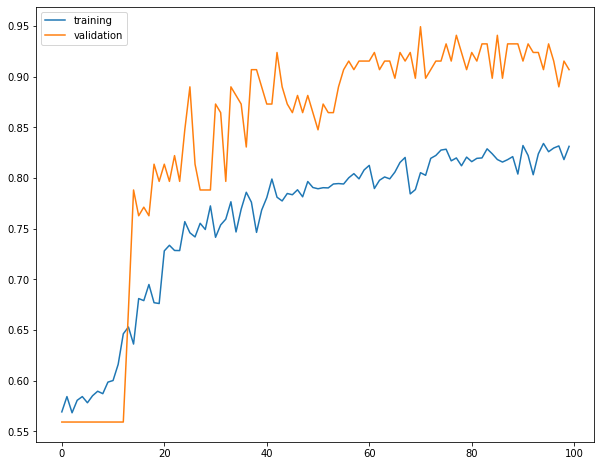

In [10]:
plt.figure(figsize=(10,8))
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.legend(["acc","val_acc","loss","val_loss"], loc = "best")

### 이진분류 1 : bad+dried vs good

In [3]:
train_generator = train_img_gen.flow_from_directory(
        'images/reclassification/train_2/',
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'binary')

test_generator = test_img_gen.flow_from_directory(
        'images/reclassification/test_2/',
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'binary')

Found 276 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [4]:
train_generator.class_indices, test_generator.class_indices3

({'badpepper': 0, 'dried': 1}, {'badpepper_test': 0, 'dried_test': 1})

In [9]:
model = Sequential()

""" ========== VGG16모델 가중치 사용하기 ========== """
model.add(Conv2D(filters=64,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False,input_shape = (224, 224, 3)))
model.add(Conv2D(filters=64,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters=128,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=128,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters=256,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=256,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=256,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(Conv2D(filters=512,kernel_size = (3,3),activation = 'relu',padding = 'same',trainable = False))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.load_weights("vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")


""" ========== FC 레이어 ========== """
model.add(Flatten())

model.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


""" ========== compile ========== """
model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
               metrics = ['accuracy'])


""" ========== stop/save option ========== """
early = EarlyStopping(monitor="val_loss", patience=10)
checkpoint = ModelCheckpoint(filepath="model/bad_dried_01_{epoch:04d}_{loss:.4f}_{accuracy:.4f}_{val_loss:.4f}_{val_accuracy:.4f}.hdf5", 
                             monitor="val_accuracy",
                             mode="max",
                             verbose=1,
                             save_best_only=True)

history1 = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator.filenames)//32 * 10,
    epochs=100,
    callbacks=[checkpoint],
    validation_data = valid_generator)

Epoch 1/100
80/80 [==============================] - 526s 7s/step - loss: 0.6834 - accuracy: 0.5693 - val_loss: 0.6567 - val_accuracy: 0.5593

Epoch 00001: val_accuracy improved from -inf to 0.55932, saving model to model/01_0001_0.6841_0.5693_0.6567_0.5593.hdf5
Epoch 2/100
80/80 [==============================] - 549s 7s/step - loss: 0.6604 - accuracy: 0.5844 - val_loss: 0.6750 - val_accuracy: 0.5593

Epoch 00002: val_accuracy did not improve from 0.55932
Epoch 3/100
80/80 [==============================] - 546s 7s/step - loss: 0.6483 - accuracy: 0.5684 - val_loss: 0.6621 - val_accuracy: 0.5593

Epoch 00003: val_accuracy did not improve from 0.55932
Epoch 4/100
80/80 [==============================] - 548s 7s/step - loss: 0.6453 - accuracy: 0.5808 - val_loss: 0.6346 - val_accuracy: 0.5593

Epoch 00004: val_accuracy did not improve from 0.55932
Epoch 5/100
80/80 [==============================] - 549s 7s/step - loss: 0.6419 - accuracy: 0.5844 - val_loss: 0.6808 - val_accuracy: 0.5593




Epoch 00039: val_accuracy did not improve from 0.90678
Epoch 40/100
80/80 [==============================] - 519s 6s/step - loss: 0.5150 - accuracy: 0.7683 - val_loss: 0.5215 - val_accuracy: 0.8898

Epoch 00040: val_accuracy did not improve from 0.90678
Epoch 41/100
80/80 [==============================] - 513s 6s/step - loss: 0.5126 - accuracy: 0.7806 - val_loss: 0.4857 - val_accuracy: 0.8729

Epoch 00041: val_accuracy did not improve from 0.90678
Epoch 42/100
80/80 [==============================] - 518s 6s/step - loss: 0.4952 - accuracy: 0.7989 - val_loss: 0.4277 - val_accuracy: 0.8729

Epoch 00042: val_accuracy did not improve from 0.90678
Epoch 43/100
80/80 [==============================] - 528s 7s/step - loss: 0.5083 - accuracy: 0.7810 - val_loss: 0.4878 - val_accuracy: 0.9237

Epoch 00043: val_accuracy improved from 0.90678 to 0.92373, saving model to model/01_0043_0.5076_0.7810_0.4878_0.9237.hdf5
Epoch 44/100
80/80 [==============================] - 556s 7s/step - loss: 0.508

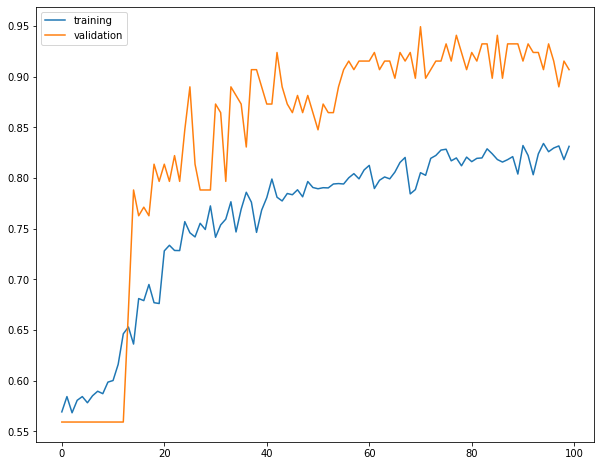

In [10]:
plt.figure(figsize=(10,8))
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.legend(["acc","val_acc","loss","val_loss"], loc = "best")